In [51]:
#r1 score is basically as harmonic mean

In [55]:
#Regularization - helps for solving overfitting issues

In [56]:
y_test.value_counts()

,count
Churn,
0,999
1,408


In [60]:
 count_class_0, count_class_1 = df2.Churn.value_counts()

df_class_0 = df2[df2['Churn']==0]
df_class_1 = df2[df2['Churn']==1]

In [61]:
df_class_0.shape

(5163, 27)

In [62]:
df_class_1.shape

(1869, 27)

In [64]:
#Topic - under sampling majority class
#means taking from majority class samples equals to minority class and then train
df_test_under = pd.concat([df_class_0.sample(df_class_1.shape[0]),df_class_1])
df_test_under.shape

(3738, 27)

In [65]:
df_test_under.Churn.value_counts()

,count
Churn,
0,1869
1,1869


In [66]:
x = df_test_under.drop('Churn', axis='columns')
y = df_test_under['Churn']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=15, stratify=y)

In [68]:
y_train.value_counts()
x_train.shape

(2990, 26)

In [71]:
import tensorflow as tf
from tensorflow import keras
model = keras.Sequential([
    keras.layers.Dense(26, input_dim=26, activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

weights=-1

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
if(weights==-1):
  model.fit(x_train, y_train, epochs=100)
else:
  model.fit(x_train, y_train, epochs=100, class_weight=weights)

model.fit(x_train, y_train, epochs=100)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6814 - loss: 0.6304
Epoch 2/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7513 - loss: 0.5068
Epoch 3/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7699 - loss: 0.4905
Epoch 4/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7707 - loss: 0.4804
Epoch 5/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7664 - loss: 0.4748
Epoch 6/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7571 - loss: 0.4947
Epoch 7/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7726 - loss: 0.4702
Epoch 8/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7827 - loss: 0.4608
Epoch 9/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7804 - loss: 0.4630
Epoch 10/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7696 - loss: 0.4691
Epoch 11/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7779 - loss: 0.4595
Epoch 12/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7852 - lo

In [78]:
import numpy as np
print(model.evaluate(x_test, y_test))
y_preds = model.predict(x_test)
y_preds = np.round(y_preds)
# y_pred = []
# for element in y_preds:
#   if element > 0.5:
#     y_pred.append(1)
#   else:
#     y_pred.append(0)

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.72      0.68      0.70       374
           1       0.70      0.74      0.72       374

    accuracy                           0.71       748
   macro avg       0.71      0.71      0.71       748
weighted avg       0.71      0.71      0.71       748



In [79]:
#METHOD2 : Oversampling

In [80]:
def ANN(x_train, y_train, x_test, y_test, loss, weights):
  model = keras.Sequential([
      keras.layers.Dense(26, input_dim=26, activation='relu'),
      keras.layers.Dense(15, activation='relu'),
      keras.layers.Dense(1, activation='sigmoid')
  ])
  model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
  if weights == -1:
    model.fit(x_train, y_train, epochs=100)
  else:
    model.fit(x_train, y_train, epochs=100, class_weight=weights)

  print(model.evaluate(x_test, y_test))
  y_preds = model.predict(x_test)
  y_preds = np.round(y_preds)
  print("Classification Report: \n", classification_report(y_test, y_preds))
  return y_preds


In [81]:
count_class_0, count_class_1

(5163, 1869)

In [90]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)

In [91]:
df_class_1_over.shape

(5163, 27)

In [92]:
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

In [93]:
df_test_over.shape

(10326, 27)

In [94]:
df_test_over.Churn.value_counts()


,count
Churn,
0,5163
1,5163


In [96]:
x = df_test_over.drop('Churn', axis='columns')
y = df_test_over['Churn']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=15, stratify=y)


In [97]:
y_train.value_counts()

,count
Churn,
1,4130
0,4130


In [98]:
y_test.value_counts()

,count
Churn,
1,1033
0,1033


In [99]:
y_preds = ANN(x_train, y_train, x_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


259/259 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6943 - loss: 0.6012
Epoch 2/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7496 - loss: 0.5054
Epoch 3/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7600 - loss: 0.4913
Epoch 4/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7654 - loss: 0.4822
Epoch 5/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7595 - loss: 0.4874
Epoch 6/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7638 - loss: 0.4750
Epoch 7/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7773 - loss: 0.4648
Epoch 8/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7772 - loss: 0.4654
Epoch 9/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7689 - loss: 0.4725
Epoch 10/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7763 - loss: 0.4665
Epoch 11/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7661 - loss: 0.4718
Epoch 12/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

In [100]:
#METHOD3: - SMOTE

In [101]:
x = df2.drop('Churn', axis='columns')
y = df2['Churn']

In [103]:
from imblearn.over_sampling import SMOTE

In [104]:
y.value_counts()

,count
Churn,
0,5163
1,1869


In [114]:
smote = SMOTE(sampling_strategy='minority')
x_sm, y_sm = smote.fit_resample(x, y)
y_sm.value_counts()

,count
Churn,
0,5163
1,5163


In [115]:
x = df_test_over.drop('Churn', axis='columns')
y = df_test_over['Churn']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_sm, y_sm, test_size=0.2, random_state=15, stratify=y)


In [116]:
y_train.value_counts()

,count
Churn,
1,4130
0,4130


In [117]:
y_test.value_counts()

,count
Churn,
1,1033
0,1033


In [118]:
y_preds = ANN(x_train, y_train, x_test, y_test, 'binary_crossentropy', -1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6839 - loss: 0.5881
Epoch 2/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7552 - loss: 0.5052
Epoch 3/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7537 - loss: 0.4945
Epoch 4/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7657 - loss: 0.4808
Epoch 5/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7631 - loss: 0.4937
Epoch 6/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7705 - loss: 0.4717
Epoch 7/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7784 - loss: 0.4667
Epoch 8/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7798 - loss: 0.4598
Epoch 9/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7771 - loss: 0.4606
Epoch 10/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7815 - loss: 0.4642
Epoch 11/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7790 - loss: 0.4640
Epoch 12/100
259/259 ━━━━━━━━━━━━━━━━━━━━

In [120]:
# METHOD4 : Use of Esemble with undersampling

x = df2.drop('Churn', axis='columns')
y = df2['Churn']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=15, stratify=y)


In [121]:
y_train.value_counts()

,count
Churn,
0,4130
1,1495


In [122]:
4130/3

1376.6666666666667

In [123]:
df3 = x_train.copy()
df3['Churn'] = y_train

In [124]:
df3_class0 = df3[df3.Churn==0]
df3_class1 = df3[df3.Churn==1]

In [128]:
df3_class0.shape, df3_class1.shape

((4130, 27), (1495, 27))

In [131]:
df3_class0[:1495].shape

(1495, 27)

In [132]:

def get_train_batch(df_majority, df_minority, start, end):
    df_train = pd.concat([df_majority[start:end], df_minority], axis=0)

    x_train = df_train.drop('Churn', axis='columns')
    y_train = df_train.Churn
    return x_train, y_train

In [134]:

x_train, y_train = get_train_batch(df3_class0, df3_class1, 0, 1495)

y_pred1 = ANN(x_train, y_train, x_test, y_test, 'binary_crossentropy', -1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6858 - loss: 0.6315
Epoch 2/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7548 - loss: 0.5176
Epoch 3/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7503 - loss: 0.5129
Epoch 4/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7760 - loss: 0.4826
Epoch 5/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7625 - loss: 0.4981
Epoch 6/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7820 - loss: 0.4743
Epoch 7/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7642 - loss: 0.4793
Epoch 8/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7611 - loss: 0.4893
Epoch 9/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7722 - loss: 0.4791
Epoch 10/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7759 - loss: 0.4786
Epoch 11/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7669 - loss: 0.4789
Epoch 12/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy:

In [138]:

x_train, y_train = get_train_batch(df3_class0, df3_class1, 1495, 1495+1495)

y_pred2 = ANN(x_train, y_train, x_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6523 - loss: 0.6302
Epoch 2/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7716 - loss: 0.5071
Epoch 3/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7572 - loss: 0.4987
Epoch 4/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7527 - loss: 0.4931
Epoch 5/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7735 - loss: 0.4807
Epoch 6/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7631 - loss: 0.4923
Epoch 7/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7666 - loss: 0.4788
Epoch 8/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7769 - loss: 0.4768
Epoch 9/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7594 - loss: 0.4791
Epoch 10/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7821 - loss: 0.4527
Epoch 11/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7687 - loss: 0.4721
Epoch 12/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7787 - lo

In [139]:

x_train, y_train = get_train_batch(df3_class0, df3_class1, 2990, 4130)

y_pred3 = ANN(x_train, y_train, x_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5783 - loss: 0.7224
Epoch 2/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7273 - loss: 0.5838
Epoch 3/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7596 - loss: 0.5227
Epoch 4/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7642 - loss: 0.5009
Epoch 5/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7706 - loss: 0.4903
Epoch 6/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7691 - loss: 0.4874
Epoch 7/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7774 - loss: 0.4804
Epoch 8/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7747 - loss: 0.4750
Epoch 9/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7809 - loss: 0.4722
Epoch 10/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7766 - loss: 0.4682
Epoch 11/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7850 - loss: 0.4621
Epoch 12/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7965 - lo

In [137]:
vote1 = 0
vote2 = 0
vote3 = 1

vote1+vote2+vote3

1

In [141]:
y_pred_final = y_pred1.copy()

for i in range(len(y_pred1)):
  n_ones = y_pred1[i] + y_pred2[i] + y_pred3[i]
  if n_ones > 1:
    y_pred_final[i] = 1
  else:
    y_pred_final[i] = 0

In [143]:
print(classification_report(y_test, y_pred_final))

              precision    recall  f1-score   support

           0       0.90      0.65      0.75      1033
           1       0.45      0.79      0.57       374

    accuracy                           0.69      1407
   macro avg       0.67      0.72      0.66      1407
weighted avg       0.78      0.69      0.71      1407



In [145]:
#Application of computer vision
#Image classification and Object Detection --> Google lens, google photos
#Banking--> deposit check online
#Agriculture --> yeild productions
#Autonomous cars --> Autopilot feature
#Retail --> Amazon go store (No employees) --> Just walk out technology
#Medical, warehouse, etc


In [146]:
# Image classification using CNN
#Feature extraction (convolution + ReLU, Pooling)
#classification
#Pooling to reduce size
# Types of pooling:-
#1 stride, 2 stride
#MAXPooling
#AVerage pooling
#

In [147]:
 #Disad of ANN:-
 #To much computation
 #sebsitive to location of an obj

In [1]:
#Image classification using CNN

In [46]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [47]:
(x_train, y_train) , (x_test, y_test) = datasets.cifar10.load_data()

In [48]:
x_train.shape

(50000, 32, 32, 3)

In [49]:
x_test.shape

(10000, 32, 32, 3)

In [50]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [51]:
classes = ['airoplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [52]:
def plot_sample(x, y, index):
  plt.figure(figsize=(15,2))
  plt.imshow(x[index])
  plt.xlabel(classes[y[index]])

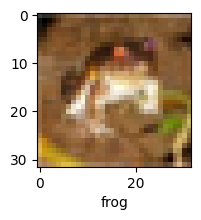

In [53]:
plot_sample(x_train, y_train, 0)

In [54]:
x_train = x_train/255
x_test = x_test/255

In [55]:
y_train.shape
x_train.shape

(50000, 32, 32, 3)

In [56]:
# y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])

ann.compile(optimizer = 'SGD',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])


ann.fit(x_train, y_train, epochs=5)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 163s 104ms/step - accuracy: 0.3011 - loss: 1.9354
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 177s 113ms/step - accuracy: 0.4191 - loss: 1.6450
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 175s 96ms/step - accuracy: 0.4538 - loss: 1.5512
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 195s 125ms/step - accuracy: 0.4751 - loss: 1.4950
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 186s 115ms/step - accuracy: 0.4937 - loss: 1.4352


In [57]:
ann.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.4863 - loss: 1.4485


[1.455604910850525, 0.4828000068664551]

In [58]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = ann.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.63      0.48      0.55      1000
           1       0.51      0.73      0.60      1000
           2       0.45      0.20      0.28      1000
           3       0.34      0.46      0.39      1000
           4       0.47      0.33      0.39      1000
           5       0.54      0.16      0.25      1000
           6       0.49      0.60      0.54      1000
           7       0.41      0.69      0.52      1000
           8       0.55      0.69      0.61      1000
           9       0.56      0.48      0.52      1000

    accuracy                           0.48     10000
   macro avg       0.50      0.48      0.46     10000
weighted avg       0.50      0.48      0.46     10000



In [59]:
#using cnn to improve performance
#softmax activation function --> normalize the probability

In [62]:
cnn = models.Sequential([
    #cnn layer --> feature extraction
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    #dense
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [65]:
cnn.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [66]:
cnn.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 52ms/step - accuracy: 0.3945 - loss: 1.6664
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 100s 64ms/step - accuracy: 0.6192 - loss: 1.0932
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 137s 61ms/step - accuracy: 0.6664 - loss: 0.9557
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 67s 43ms/step - accuracy: 0.7010 - loss: 0.8684
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 44ms/step - accuracy: 0.7274 - loss: 0.7897
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 44ms/step - accuracy: 0.7474 - loss: 0.7304
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 67s 43ms/step - accuracy: 0.7638 - loss: 0.6776
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 67s 43ms/step - accuracy: 0.7847 - loss: 0.6241
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 67s 43ms/step - accuracy: 0.7962 - loss: 0.5820
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 43ms/step - accuracy: 0.8151 - loss: 0.5385


In [67]:
cnn.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.6946 - loss: 0.9351


[0.9362627863883972, 0.6937999725341797]

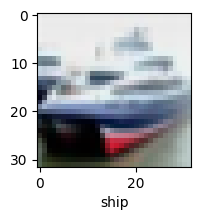

In [69]:
y_test = y_test.reshape(-1,)
plot_sample(x_test, y_test, 1)

In [70]:
y_pred = cnn.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step


In [71]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[np.int64(3), np.int64(8), np.int64(8), np.int64(0), np.int64(6)]

In [72]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

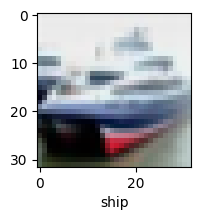

In [73]:
plot_sample(x_test, y_test, 1)

In [74]:
classes[y_classes[1]]

'ship'

In [ ]:
#Convolution padding and stride
#Valid padding - No padding
#same convolution - pad such that output is same as input
#stride(x, y) = shifting of kernel at coordinate x and y
